In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

zctas = gpd.read_file("./data/tl_2020_us_zcta510/tl_2020_us_zcta510.shp")

stations = pd.read_csv('./data/Divvy_Bicycle_Stations_20240725.csv')
stations['geometry'] = stations.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
observations_gdf = gpd.GeoDataFrame(stations, geometry='geometry', crs=zctas.crs)

observations_with_zcta = gpd.sjoin(observations_gdf, zctas, how='left', predicate='within')
observations_with_zcta = observations_with_zcta[['ID', 'Status', 'Docks in Service', 'Latitude', 'Longitude', 'GEOID10']]
print(observations_with_zcta.GEOID10.unique())
observations_with_zcta

['60612' '60647' '60617' '60608' '60645' '60621' '60637' '60657' '60618'
 '60622' '60614' '60619' '60636' '60659' '60610' '60707' '60607' '60643'
 '60639' '60623' '60624' '60634' '60641' '60651' '60625' '60628' '60630'
 '60827' '60632' '60644' '60655' '60661' '60616' '60609' '60620' '60649'
 '60629' '60638' '60605' '60601' '60602' '60653' '60633' '60615' '60611'
 '60606' '60640' '60654' '60626' '60642' '60604' '60660' '60603' '60201'
 '60202' '60613']


,ID,Status,Docks in Service,Latitude,Longitude,GEOID10
0,1594046383808271024,In Service,9,41.877505,-87.704850,60612
1,641,In Service,11,41.914166,-87.716755,60647
2,1683527931525155814,In Service,1,41.736881,-87.583146,60617
3,367,In Service,15,41.830689,-87.656211,60608
4,1673852313397164648,In Service,2,42.011865,-87.701317,60645
...,...,...,...,...,...,...
1414,20,In Service,15,41.910522,-87.653106,60642
1415,54,In Service,19,41.896362,-87.654061,60642
1416,693,In Service,15,41.737336,-87.548515,60617
1417,718,In Service,11,41.712749,-87.534814,60617


In [2]:
import pandas as pd
import os

# Function to clean column names
def clean_column_names(df, metadata_df):
    col_map = dict(zip(metadata_df['Column Name'], metadata_df['Label']))
    df.rename(columns=col_map, inplace=True)
    df.columns = [col.replace('ZTA5', '') for col in df.columns]
    return df

def prettify_column_names(df):
    df.columns = [' '.join(word.capitalize() for word in col.replace('_', ' ').split()) for col in df.columns]
    return df

# List of files
data_files = [
    './data/demographic/data/ACSST5Y2022.S0101-Data.csv',
    './data/demographic/data/ACSST5Y2022.S0701-Data.csv',
    './data/demographic/data/ACSST5Y2022.S0801-Data.csv',
    './data/demographic/data/ACSST5Y2022.S0802-Data.csv'
]

metadata_files = [
    './data/demographic/data/ACSST5Y2022.S0101-Column-Metadata.csv',
    './data/demographic/data/ACSST5Y2022.S0701-Column-Metadata.csv',
    './data/demographic/data/ACSST5Y2022.S0801-Column-Metadata.csv',
    './data/demographic/data/ACSST5Y2022.S0802-Column-Metadata.csv'
]

dataframes = []
for data_file, metadata_file in zip(data_files, metadata_files):
    data_df = pd.read_csv(data_file)
    metadata_df = pd.read_csv(metadata_file)
    cleaned_df = clean_column_names(data_df, metadata_df)
    dataframes.append(cleaned_df)

# Merge all dataframes on the ZIP code column
merged_df = pd.concat(dataframes, axis=1, join='inner')
merged_df = merged_df.loc[:,~merged_df.columns.duplicated()]

merged_df = prettify_column_names(merged_df)

data = merged_df

data_cleaned = data.drop(index=0)
data_cleaned['Geographic Area Name'] = data_cleaned['Geographic Area Name'].str.replace('ZCTA5 ', '')
columns_to_keep = [col for col in data_cleaned.columns if not col.startswith('Margin Of Error!!')]
data_cleaned = data_cleaned[columns_to_keep]
data_cleaned.columns = data_cleaned.columns.str.replace('Estimate!!', '')
# data_cleaned.to_csv('./data/demographic.csv', index=False)  
data_cleaned


,Geography,Geographic Area Name,total!!total Population,total!!total Population!!age!!under 5 Years,total!!total Population!!age!!5 To 9 Years,total!!total Population!!age!!10 To 14 Years,total!!total Population!!age!!15 To 19 Years,total!!total Population!!age!!20 To 24 Years,total!!total Population!!age!!25 To 29 Years,total!!total Population!!age!!30 To 34 Years,...,public Transportation (excluding Taxicab)!!workers 16 Years And Over In Households!!housing Tenure!!renter-occupied Housing Units,public Transportation (excluding Taxicab)!!workers 16 Years And Over In Households!!vehicles Available!!no Vehicle Available,public Transportation (excluding Taxicab)!!workers 16 Years And Over In Households!!vehicles Available!!1 Vehicle Available,public Transportation (excluding Taxicab)!!workers 16 Years And Over In Households!!vehicles Available!!2 Vehicles Available,public Transportation (excluding Taxicab)!!workers 16 Years And Over In Households!!vehicles Available!!3 Or More Vehicles Available,public Transportation (excluding Taxicab)!!percent Allocated!!means Of Transportation To Work,public Transportation (excluding Taxicab)!!percent Allocated!!time Of Departure To Go To Work,public Transportation (excluding Taxicab)!!percent Allocated!!travel Time To Work,public Transportation (excluding Taxicab)!!percent Allocated!!vehicles Available,Unnamed: 810
1,860Z200US60201,60201,43122,1674,1998,2400,4453,6189,3095,1770,...,34.4,15.3,37.8,33.3,13.7,(X),(X),(X),(X),NaN
2,860Z200US60202,60202,33868,1935,2245,1896,1766,1712,2269,2801,...,60.7,24.1,53.4,16.7,5.8,(X),(X),(X),(X),NaN
3,860Z200US60203,60203,4540,279,292,452,318,207,67,157,...,0.0,0.0,58.6,35.2,6.3,(X),(X),(X),(X),NaN
4,860Z200US60208,60208,191,0,0,0,109,71,8,3,...,-,-,-,-,-,(X),(X),(X),(X),NaN
5,860Z200US60601,60601,16398,449,376,258,539,1756,3461,2764,...,89.0,83.4,16.6,0.0,0.0,(X),(X),(X),(X),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,860Z200US60714,60714,30857,1439,1645,1244,1567,1468,1628,1837,...,20.5,2.5,18.2,34.3,44.9,(X),(X),(X),(X),NaN
65,860Z200US60803,60803,22198,1250,1624,1328,1472,1332,1128,1266,...,49.8,8.6,17.3,48.3,25.8,(X),(X),(X),(X),NaN
66,860Z200US60804,60804,84189,4565,5766,6896,8024,7967,5405,5482,...,58.8,22.0,33.1,25.6,19.3,(X),(X),(X),(X),NaN
67,860Z200US60805,60805,19730,1790,1167,1141,1114,1085,1148,1517,...,23.0,1.3,10.8,48.4,39.5,(X),(X),(X),(X),NaN


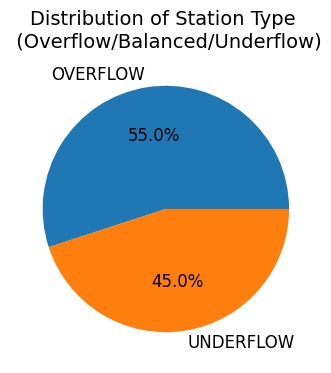

In [6]:
merged_data = pd.merge(observations_with_zcta, data_cleaned, left_on='GEOID10', right_on='Geographic Area Name', how='inner')
stations = pd.read_csv("./data/station_results.csv")
df = pd.merge(stations, merged_data, left_on='STATION ID', right_on='ID', how='inner') 
# df.to_csv('./data/demographic_stations.csv', index=False) 
df
import matplotlib.pyplot as plt
result_counts = df['RESULT'].value_counts()
plt.figure(figsize=(6, 4))
result_counts.plot.pie(autopct='%1.1f%%', textprops={'fontsize': 12})
plt.title('Distribution of Station Type \n (Overflow/Balanced/Underflow)', fontsize=14)
plt.ylabel('')
plt.show()

In [ ]:
# column_names = df.columns.tolist()
# for col in column_names:
#     print(col)

# Select specified variables
selected_columns = [
    'STATION ID', 'Latitude', 'Longitude', 'Docks in Service', 'RESULT',
    
    'total!!total Population',
    'percent!!total Population!!selected Age Categories!!under 18 Years',
    'percent!!total Population!!selected Age Categories!!21 Years And Over',
    'percent!!total Population!!selected Age Categories!!60 Years And Over',
    'total!!total Population!!summary Indicators!!median Age (years)',
    'total!!total Population!!summary Indicators!!sex Ratio (males Per 100 Females)',
    
    'total!!educational Attainment!!population 25 Years And Over!!bachelor\'s Degree',
    'total!!educational Attainment!!population 25 Years And Over!!graduate Or Professional Degree',
    
    'total!!individual Income In The Past 12 Months (in 2022 Inflation-adjusted Dollars)!!population 15 Years And Over!!$75,000 Or More',
    'total!!poverty Status In The Past 12 Months!!population 1 Year And Over For Whom Poverty Status Is Determined!!below 100 Percent Of The Poverty Level',
    
    'total!!workers 16 Years And Over!!means Of Transportation To Work!!public Transportation (excluding Taxicab)',
    'total!!workers 16 Years And Over!!means Of Transportation To Work!!walked',
    'total!!workers 16 Years And Over!!means Of Transportation To Work!!bicycle',
    'total!!workers 16 Years And Over!!means Of Transportation To Work!!taxicab, Motorcycle, Or Other Means',
    'total!!workers 16 Years And Over!!means Of Transportation To Work!!worked From Home',
    'total!!workers 16 Years And Over Who Did Not Work From Home!!travel Time To Work!!mean Travel Time To Work (minutes)',
    
    'total!!housing Tenure!!population 1 Year And Over In Housing Units!!householder Lived In Owner-occupied Housing Units',
    'total!!housing Tenure!!population 1 Year And Over In Housing Units!!householder Lived In Renter-occupied Housing Units',
    
    'moved; Within Same County!!population 1 Year And Over',
    'moved; From Different County, Same State!!population 1 Year And Over',
    'moved; From Different State!!population 1 Year And Over',
    'moved; From Abroad!!population 1 Year And Over'
]

# Create a new DataFrame with the selected columns
df_selected = df[selected_columns]

df_selected.columns = [
    'station_id', 'latitude', 'longitude', 'docks_in_service', 'result',
    'total_population',
    'percent_under_18',
    'percent_21_and_over',
    'percent_60_and_over',
    'median_age',
    'sex_ratio',
    'bachelors_degree',
    'graduate_degree',
    'income_75000_or_more',
    'below_poverty_level',
    'public_transportation',
    'walked',
    'bicycle',
    'taxicab_motorcycle_other',
    'worked_from_home',
    'mean_travel_time',
    'owner_occupied_housing',
    'renter_occupied_housing',
    'moved_within_same_county',
    'moved_different_county_same_state',
    'moved_different_state',
    'moved_from_abroad'
]

# Impute missing values with the median for numerical columns
for column in df_selected.columns:
    if df_selected[column].dtype in ['float64', 'int64']:
        df_selected[column].fillna(df_selected[column].median(), inplace=True)
    else:
        df_selected[column].fillna(df_selected[column].mode()[0], inplace=True)

# Save the cleaned DataFrame to a new CSV file
df_selected.to_csv('./data/cleaned_demographic_stations.csv', index=False)

In [15]:
df_selected

,station_id,latitude,longitude,docks_in_service,result,total_population,percent_under_18,percent_21_and_over,percent_60_and_over,median_age,...,bicycle,taxicab_motorcycle_other,worked_from_home,mean_travel_time,owner_occupied_housing,renter_occupied_housing,moved_within_same_county,moved_different_county_same_state,moved_different_state,moved_from_abroad
0,2,41.876423,-87.620339,39,UNDERFLOW,34314,9.1,83.4,15.8,32.9,...,1.2,3.3,25.7,27.9,14045,16745,17.8,4.4,7.6,0.9
1,3,41.867226,-87.615355,55,UNDERFLOW,34314,9.1,83.4,15.8,32.9,...,1.2,3.3,25.7,27.9,14045,16745,17.8,4.4,7.6,0.9
2,4,41.857412,-87.613792,23,OVERFLOW,34314,9.1,83.4,15.8,32.9,...,1.2,3.3,25.7,27.9,14045,16745,17.8,4.4,7.6,0.9
3,5,41.874053,-87.627716,23,OVERFLOW,34314,9.1,83.4,15.8,32.9,...,1.2,3.3,25.7,27.9,14045,16745,17.8,4.4,7.6,0.9
4,6,41.886976,-87.612813,39,UNDERFLOW,35247,5.5,93.6,27.7,38.3,...,1.7,6.2,20.5,25.1,15709,19175,12.8,2.7,10.4,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,664,41.939354,-87.683282,15,OVERFLOW,92235,21.3,76.9,13.5,35.4,...,2.0,1.3,20.9,34.8,49814,40969,11.0,0.6,1.6,0.5
605,665,41.747363,-87.580046,7,UNDERFLOW,83188,24.8,71.4,21.9,36.8,...,0.2,1.8,8.9,39.5,46927,34885,6.0,0.4,1.0,0.2
606,666,41.907221,-87.655618,15,OVERFLOW,21444,9.1,89.0,8.8,32.0,...,2.5,2.5,24.4,27.6,7647,13426,18.5,1.7,3.8,0.2
607,672,41.891023,-87.635480,11,OVERFLOW,23475,4.3,93.7,10.6,32.4,...,1.9,5.6,28.1,25.3,8871,14209,17.7,2.1,12.4,1.0


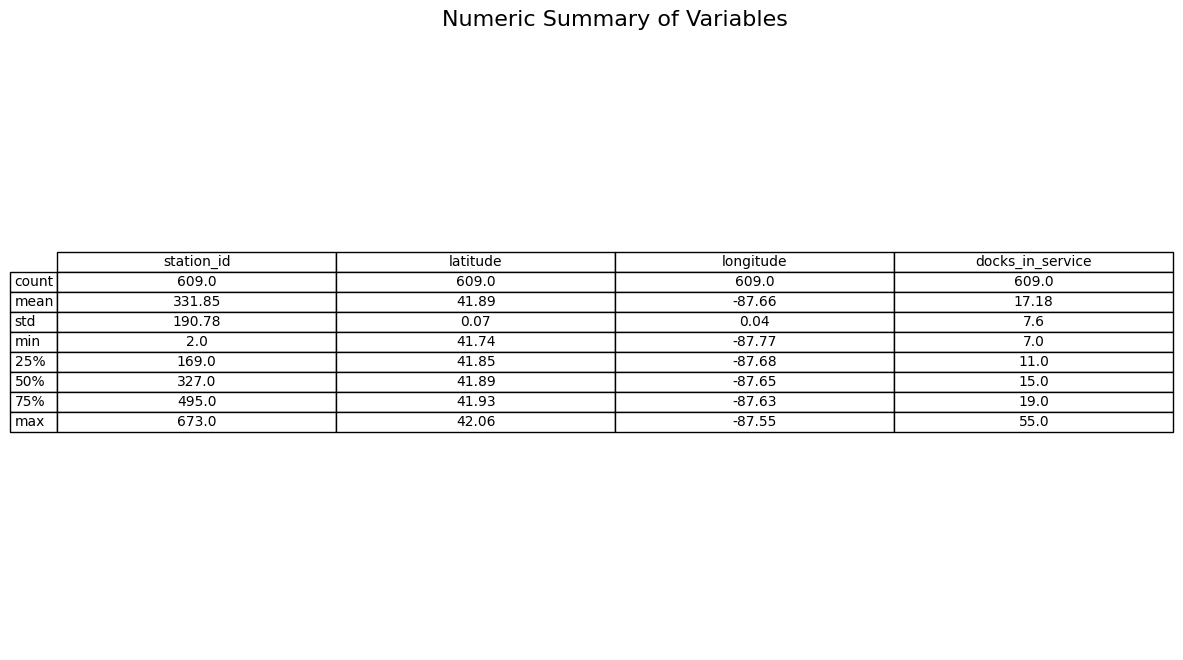

,station_id,latitude,longitude,docks_in_service,result,total_population,percent_under_18,percent_21_and_over,percent_60_and_over,median_age,...,bicycle,taxicab_motorcycle_other,worked_from_home,mean_travel_time,owner_occupied_housing,renter_occupied_housing,moved_within_same_county,moved_different_county_same_state,moved_different_state,moved_from_abroad
0,2,41.876423,-87.620339,39,UNDERFLOW,34314,9.1,83.4,15.8,32.9,...,1.2,3.3,25.7,27.9,14045,16745,17.8,4.4,7.6,0.9
1,3,41.867226,-87.615355,55,UNDERFLOW,34314,9.1,83.4,15.8,32.9,...,1.2,3.3,25.7,27.9,14045,16745,17.8,4.4,7.6,0.9
2,4,41.857412,-87.613792,23,OVERFLOW,34314,9.1,83.4,15.8,32.9,...,1.2,3.3,25.7,27.9,14045,16745,17.8,4.4,7.6,0.9
3,5,41.874053,-87.627716,23,OVERFLOW,34314,9.1,83.4,15.8,32.9,...,1.2,3.3,25.7,27.9,14045,16745,17.8,4.4,7.6,0.9
4,6,41.886976,-87.612813,39,UNDERFLOW,35247,5.5,93.6,27.7,38.3,...,1.7,6.2,20.5,25.1,15709,19175,12.8,2.7,10.4,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,664,41.939354,-87.683282,15,OVERFLOW,92235,21.3,76.9,13.5,35.4,...,2.0,1.3,20.9,34.8,49814,40969,11.0,0.6,1.6,0.5
605,665,41.747363,-87.580046,7,UNDERFLOW,83188,24.8,71.4,21.9,36.8,...,0.2,1.8,8.9,39.5,46927,34885,6.0,0.4,1.0,0.2
606,666,41.907221,-87.655618,15,OVERFLOW,21444,9.1,89.0,8.8,32.0,...,2.5,2.5,24.4,27.6,7647,13426,18.5,1.7,3.8,0.2
607,672,41.891023,-87.635480,11,OVERFLOW,23475,4.3,93.7,10.6,32.4,...,1.9,5.6,28.1,25.3,8871,14209,17.7,2.1,12.4,1.0


In [20]:
import seaborn as sns
summary = df_selected.describe()

fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')
tbl = ax.table(cellText=summary.round(2).values,
               colLabels=summary.columns,
               rowLabels=summary.index,
               cellLoc='center', 
               loc='center')

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)

plt.title('Numeric Summary of Variables', fontsize=16)
plt.show()
df_selected

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [95]:
X = df_selected.drop(columns=['result', 'station_id', 'latitude', 'longitude', 'docks_in_service',])
y = df_selected['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluate the models
def evaluate_model(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    return cm, accuracy, precision, recall, f1

# Logistic Regression evaluation
cm_logreg, acc_logreg, prec_logreg, rec_logreg, f1_logreg = evaluate_model(y_test, y_pred_logreg)
print(f"Logistic Regression:\nConfusion Matrix:\n{cm_logreg}\nAccuracy: {acc_logreg}\nPrecision: {prec_logreg}\nRecall: {rec_logreg}\nF1 Score: {f1_logreg}\n")

# Decision Tree evaluation
cm_tree, acc_tree, prec_tree, rec_tree, f1_tree = evaluate_model(y_test, y_pred_tree)
print(f"Decision Tree:\nConfusion Matrix:\n{cm_tree}\nAccuracy: {acc_tree}\nPrecision: {prec_tree}\nRecall: {rec_tree}\nF1 Score: {f1_tree}\n")

# SVM evaluation
cm_svm, acc_svm, prec_svm, rec_svm, f1_svm = evaluate_model(y_test, y_pred_svm)
print(f"Support Vector Machine:\nConfusion Matrix:\n{cm_svm}\nAccuracy: {acc_svm}\nPrecision: {prec_svm}\nRecall: {rec_svm}\nF1 Score: {f1_svm}\n")

Logistic Regression:
Confusion Matrix:
[[78 24]
 [42 39]]
Accuracy: 0.639344262295082
Precision: 0.6345238095238095
Recall: 0.6230936819172113
F1 Score: 0.6221846846846847

Decision Tree:
Confusion Matrix:
[[70 32]
 [41 40]]
Accuracy: 0.6010928961748634
Precision: 0.5930930930930931
Recall: 0.5900508351488744
F1 Score: 0.5900764061493142

Support Vector Machine:
Confusion Matrix:
[[85 17]
 [47 34]]
Accuracy: 0.6502732240437158
Precision: 0.6553030303030303
Recall: 0.6265432098765432
F1 Score: 0.6208236208236209



In [96]:
def feature_selection_rfe(model, X_train, y_train):
    selector = RFE(model, n_features_to_select=10, step=1)
    selector = selector.fit(X_train, y_train)
    return selector

def feature_selection_kbest(X_train, y_train, k=10):
    selector = SelectKBest(score_func=f_classif, k=k)
    selector.fit(X_train, y_train)
    return selector

def fine_tune_and_evaluate(model, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    return cm, accuracy, precision, recall, f1, grid_search.best_params_

def print_selected_features(selector, X, model_name):
    selected_features = X.columns[selector.get_support()]
    print(f"{model_name} selected features: {selected_features}\n")

# Logistic Regression
logreg = LogisticRegression()
selector_logreg = feature_selection_rfe(logreg, X_train, y_train)
X_train_logreg = selector_logreg.transform(X_train)
X_test_logreg = selector_logreg.transform(X_test)
print_selected_features(selector_logreg, X, "Logistic Regression")
param_grid_logreg = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
cm_logreg, acc_logreg, prec_logreg, rec_logreg, f1_logreg, best_params_logreg = fine_tune_and_evaluate(logreg, param_grid_logreg, X_train_logreg, y_train, X_test_logreg, y_test)
print(f"Logistic Regression:\nBest Params: {best_params_logreg}\nConfusion Matrix:\n{cm_logreg}\nAccuracy: {acc_logreg}\nPrecision: {prec_logreg}\nRecall: {rec_logreg}\nF1 Score: {f1_logreg}\n")

# Decision Tree
tree = DecisionTreeClassifier()
selector_tree = feature_selection_rfe(tree, X_train, y_train)
X_train_tree = selector_tree.transform(X_train)
X_test_tree = selector_tree.transform(X_test)
print_selected_features(selector_tree, X, "Decision Tree")
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}
cm_tree, acc_tree, prec_tree, rec_tree, f1_tree, best_params_tree = fine_tune_and_evaluate(tree, param_grid_tree, X_train_tree, y_train, X_test_tree, y_test)
print(f"Decision Tree:\nBest Params: {best_params_tree}\nConfusion Matrix:\n{cm_tree}\nAccuracy: {acc_tree}\nPrecision: {prec_tree}\nRecall: {rec_tree}\nF1 Score: {f1_tree}\n")

# Support Vector Machine (SVM)
svm = SVC()
selector_svm = feature_selection_kbest(X_train, y_train)
X_train_svm = selector_svm.transform(X_train)
X_test_svm = selector_svm.transform(X_test)
print_selected_features(selector_svm, X, "Support Vector Machine")
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}
cm_svm, acc_svm, prec_svm, rec_svm, f1_svm, best_params_svm = fine_tune_and_evaluate(svm, param_grid_svm, X_train_svm, y_train, X_test_svm, y_test)
print(f"SVM:\nBest Params: {best_params_svm}\nConfusion Matrix:\n{cm_svm}\nAccuracy: {acc_svm}\nPrecision: {prec_svm}\nRecall: {rec_svm}\nF1 Score: {f1_svm}\n")

Logistic Regression selected features: Index(['total_population', 'percent_under_18', 'percent_21_and_over',
       'percent_60_and_over', 'median_age', 'graduate_degree',
       'income_75000_or_more', 'walked', 'taxicab_motorcycle_other',
       'moved_from_abroad'],
      dtype='object')

Logistic Regression:
Best Params: {'C': 10, 'solver': 'saga'}
Confusion Matrix:
[[69 33]
 [45 36]]
Accuracy: 0.5737704918032787
Precision: 0.5635011441647597
Recall: 0.5604575163398693
F1 Score: 0.5594444444444444

Decision Tree selected features: Index(['median_age', 'income_75000_or_more', 'walked', 'bicycle',
       'taxicab_motorcycle_other', 'worked_from_home',
       'owner_occupied_housing', 'renter_occupied_housing',
       'moved_within_same_county', 'moved_different_county_same_state'],
      dtype='object')

Decision Tree:
Best Params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
Confusion Matrix:
[[70 32]
 [41 40]]
Accuracy: 0.6010928961748634
Precision: 0.593093093

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The ma

SVM:
Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
Confusion Matrix:
[[68 34]
 [29 52]]
Accuracy: 0.6557377049180327
Precision: 0.6528410453128746
Recall: 0.654320987654321
F1 Score: 0.6530857882225498



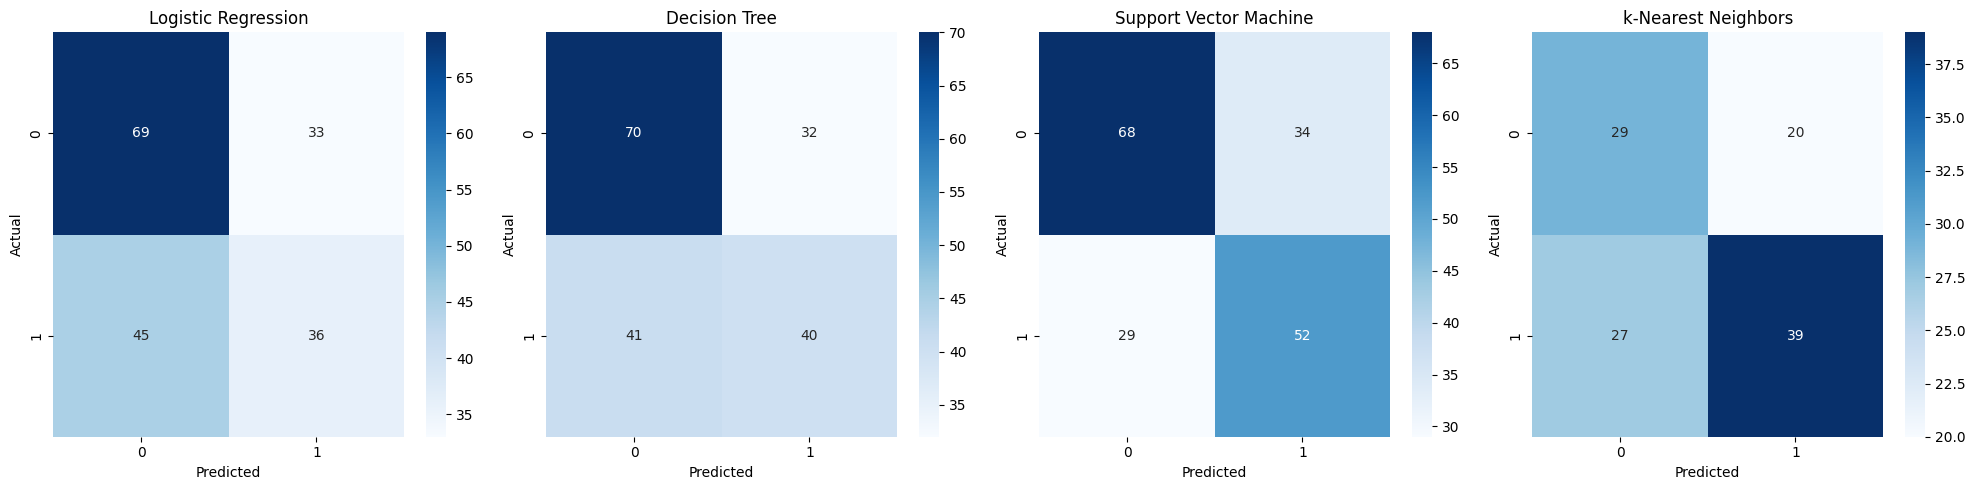

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example confusion matrices
conf_matrix_logreg = [[69, 33], [45, 36]]
conf_matrix_tree = [[70, 32], [41, 40]]
conf_matrix_svm = [[68, 34], [29, 52]]
conf_matrix_knn = [[29, 20], [27, 39]]

# Plotting the confusion matrices
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Decision Tree')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Support Vector Machine')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', ax=axes[3])
axes[3].set_title('k-Nearest Neighbors')
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('Actual')

plt.tight_layout()
plt.show()
